In [1]:
# Solve 1D diffusion with the explicit solver
#
# A tutorial example adapted from the FiPy 1D diffusion example
# see: http://www.ctcms.nist.gov/fipy/examples/diffusion/index.html

In [2]:
import pyfvtool as pf
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf

In [3]:
# define the domain
L = 5.0  # domain length
Nx = 100 # number of cells

In [4]:
meshstruct = pf.Grid1D(Nx, L)

In [5]:
BC = pf.BoundaryConditions(meshstruct) # all Neumann boundary condition structure
BC.left.a[:] = 0 
BC.left.b[:]=1 
BC.left.c[:]=1 # left boundary
BC.right.a[:] = 0 
BC.right.b[:]=1 
BC.right.c[:]=0 # right boundary

In [6]:
x = meshstruct.cellcenters.x

In [7]:
## define the transfer coeffs
D_val = 1.0
alfa = pf.CellVariable(meshstruct, 1)
Dave = pf.FaceVariable(meshstruct, D_val)

In [8]:
## define initial values
c_old = pf.CellVariable(meshstruct, 0, BC) # initial values
c = pf.CellVariable(meshstruct, 0, BC) # working values

In [9]:
## loop
dt = 0.001 # time step
final_t = 0.5
for t in np.arange(dt, final_t, dt):
    # step 1: calculate divergence term
    RHS = pf.divergenceTerm(Dave*pf.gradientTerm(c_old))
    # step 2: calculate the new value for internal cells
    c = pf.solveExplicitPDE(c_old, dt, RHS)
    c_old.update_value(c)

In [10]:
# analytic solution
c_analytic = 1-erf(x/(2*np.sqrt(D_val*t)))


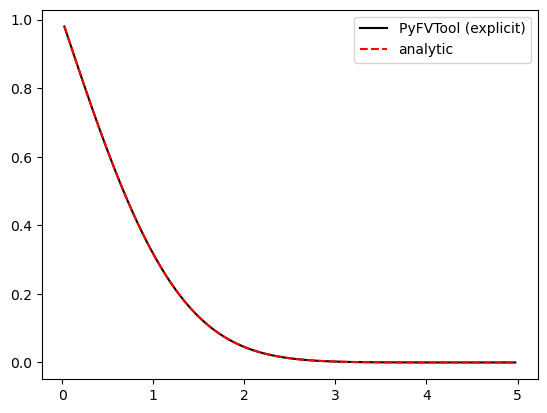

In [11]:
plt.figure(1)
plt.clf()
plt.plot(x, c.value, 'k', label = 'PyFVTool (explicit)')
plt.plot(x, c_analytic, 'r--', label = 'analytic')
plt.legend()
plt.show()

In [12]:
# Now, solve the same problem in a 2D cylindrical system (a rod) 
#
# compare to the 1D analytic solution (along line near the center of the rod)

In [13]:
# define the domain
L = 5.0  # domain length
N = 100 # number of cells

In [14]:
meshstruct = pf.CylindricalGrid2D(N, N, L, L)

In [15]:
BC = pf.BoundaryConditions(meshstruct) # all Neumann boundary condition structure
BC.bottom.a[:] = 0.0 
BC.bottom.b[:] = 1.0 
BC.bottom.c[:] = 1.0 # bottom boundary
BC.top.a[:] = 0.0 
BC.top.b[:] = 1.0 
BC.top.c[:] = 0.0 # top boundary

In [16]:
r = meshstruct.cellcenters.r

In [17]:
## define the transfer coeffs
D_val = 1.0
alfa = pf.CellVariable(meshstruct, 1.0)
Dave = pf.FaceVariable(meshstruct, D_val)

In [18]:
## define initial values
c_old = pf.CellVariable(meshstruct, 0.0, BC) # initial values
c = pf.CellVariable(meshstruct, 0.0, BC) # working values

In [19]:
## loop
dt = 0.001 # time step
final_t = 100*dt
for t in np.arange(dt, final_t, dt):
    # step 1: calculate divergence term
    RHS = pf.divergenceTerm(Dave*pf.gradientTerm(c_old))
    # step 2: calculate the new value for internal cells
    c = pf.solveExplicitPDE(c_old, dt, RHS)
    c_old.update_value(c)

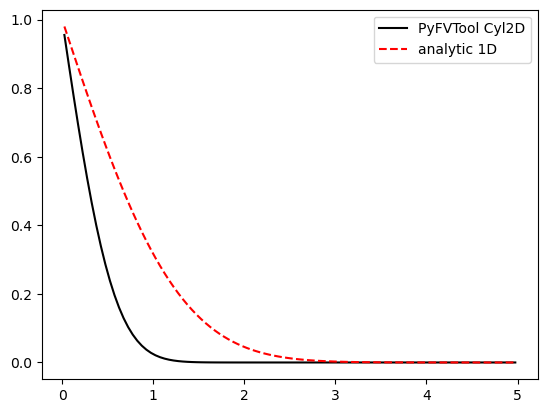

In [20]:
plt.figure(2)
plt.clf()
plt.plot(r, c.value[1,:], 'k', label='PyFVTool Cyl2D')
plt.plot(r, c_analytic, 'r--', label='analytic 1D')
plt.legend()
plt.show()